In [23]:
import pandas as pd

data = pd.read_csv("Mall_Customers.csv")

# Nova seção

Analise Exploratorio

In [24]:
data.isna().any()


CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [25]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


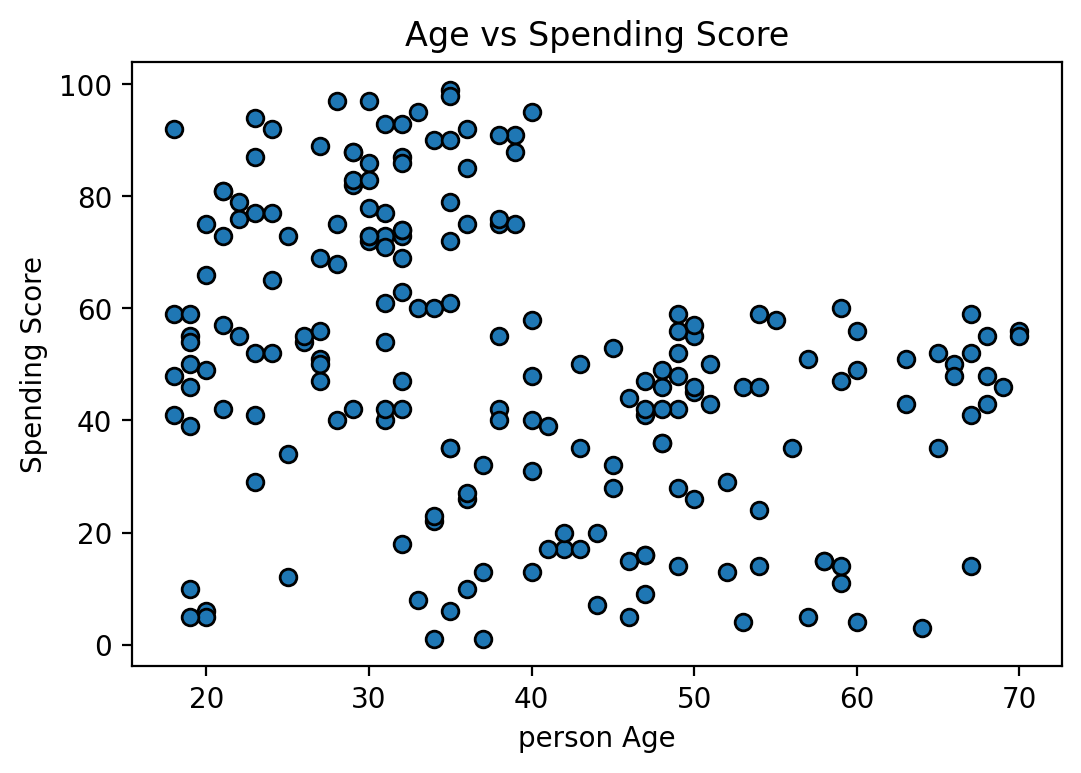

In [26]:
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"]= 200
plt.scatter(data["Age"], data["Spending Score (1-100)"], marker="o" , edgecolors="black")
plt.title("Age vs Spending Score")
plt.xlabel("person Age")
plt.ylabel("Spending Score")

plt.show()

In [30]:
import numpy as np
data_modelo = []

#percorrendo linha a linha dos dados para transformar os dados em lista de lista
for linha in data.itertuples():
  
  temp = [linha.Age , linha._5]
  data_modelo.append(temp)

data = np.array(data_modelo)
data

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

Método gráfico que consiste em criar vários modelos e depois avaliar

In [31]:
from sklearn.cluster import KMeans

distortions = []
#achando que tem entre 1 a 21 grupos 
for qtd in range(1,21):
  modelo =  KMeans(n_clusters=qtd)
  modelo.fit(data)

  #media das somas das distancias de cada ponto para o centroide do seu grupo
  metrica = modelo.inertia_
  distortions.append(metrica)

In [32]:
# é a avalição criada de cada modelo q ele fez com 1,2,3...21 grupos e ve qual fico melhor
distortions

[171535.5,
 75949.15601023017,
 45840.67661610867,
 28165.58356662934,
 23842.68178795084,
 19502.407839362204,
 15514.19313435103,
 13055.626865965576,
 11483.06792862839,
 10157.772354497354,
 9552.381606976902,
 8585.935122592076,
 7968.288512241001,
 7513.607473230642,
 6702.950000081618,
 6144.382383371702,
 5608.860154620062,
 5414.57442009315,
 4962.162694168576,
 4645.896755368814]

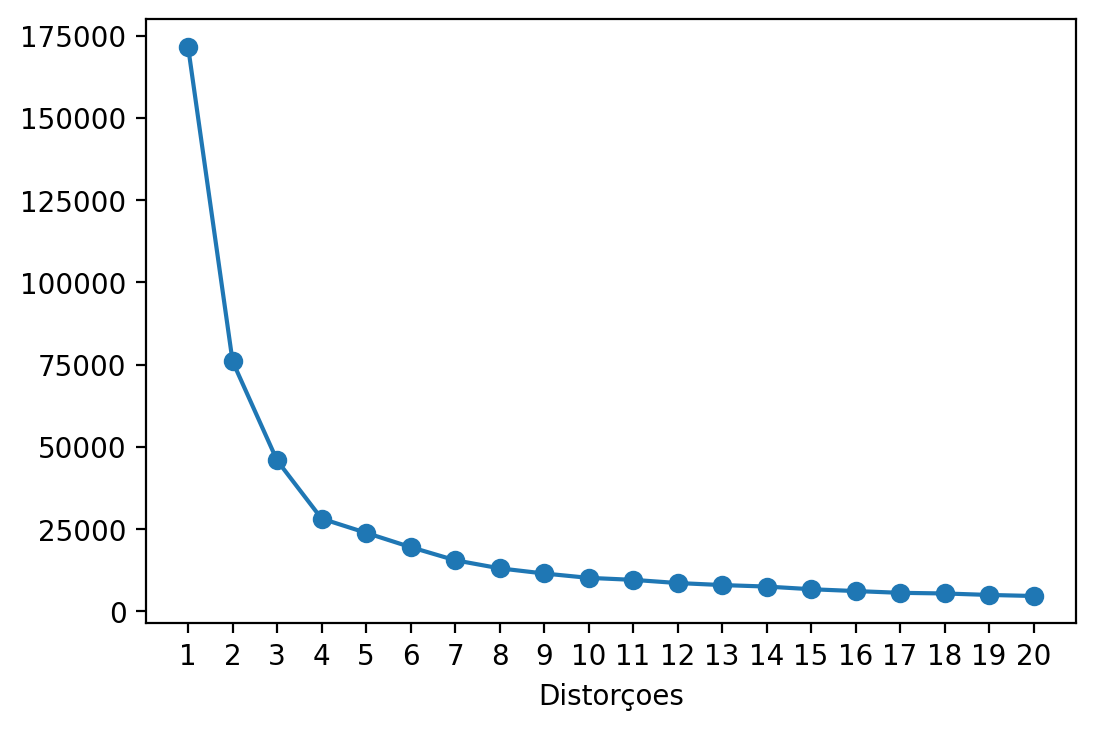

In [33]:
plt.rcParams["figure.dpi"] =200

plt.plot(range(1,21), distortions , marker="o")

plt.xlabel("quantidade de grupos")
plt.xlabel("Distorçoes")

plt.xticks(range(1,21))

plt.show()

In [34]:
modelo = KMeans(n_clusters=19)
modelo.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=19, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [35]:
resposta = modelo.predict(data)

Metricas de Avaliação

In [36]:
# ver se o metodo usado foi bom,se a maquina deu uma resposta boa 
from sklearn.metrics import calinski_harabasz_score, silhouette_score

# silhouette_score(dados, respostas que o model achou )
# sh = varia de -1 a 1 (quanto mais proximo de 1 melhor )quer dizer q a bolinha esta mais semelhante a aquele grupo analisado mesmo
sh = silhouette_score(data, modelo.labels_ )

# calinski_harabasz_score(dados, respostas que o model achou )
#ch = quanto maior melhor 
ch = calinski_harabasz_score(data, modelo.labels_ )

print(f"SH: {sh}") # se o SH ele computa a media de todas as amostras
print("CH: ", ch) 

SH: 0.3952272240447081
CH:  340.39128721233243


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

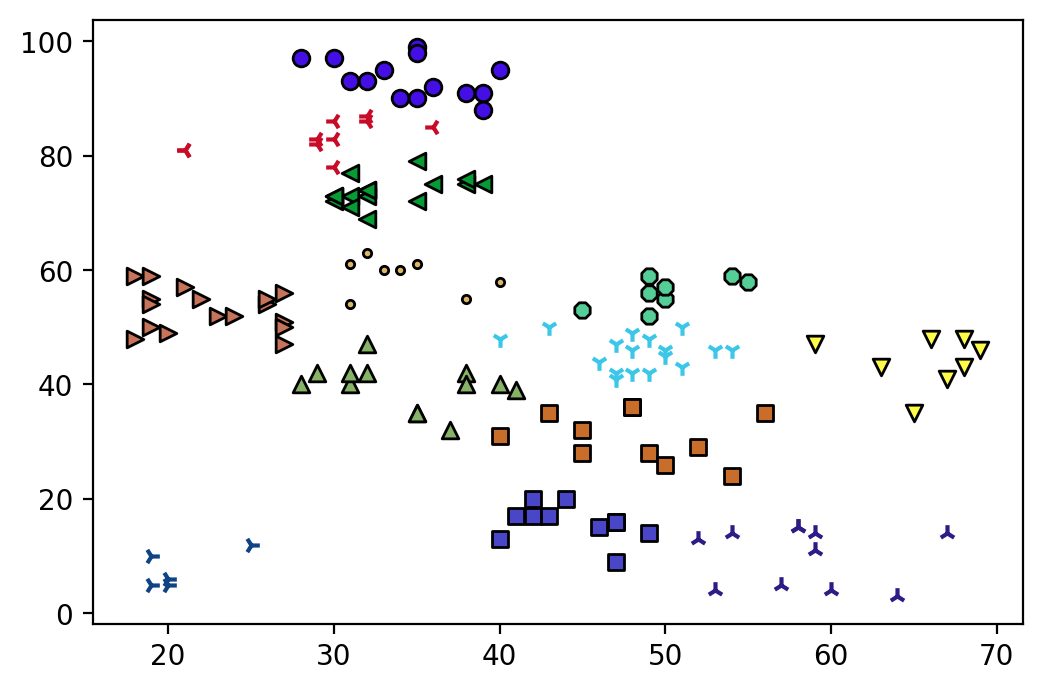

In [37]:
from matplotlib.lines import Line2D

markers= list(Line2D.markers.keys())

for i in range(13):
  grupo=data[resposta== i]
  plt.scatter(grupo[:,0], grupo[:,1], c =np.random.rand(3), marker= markers[i], edgecolors="black")
  
plt.show()